In [1]:
using LightGraphs, GraphPlot, Compose, PyPlot

In [ ]:
using MLDatasets

train_x, train_y = MNIST.traindata()

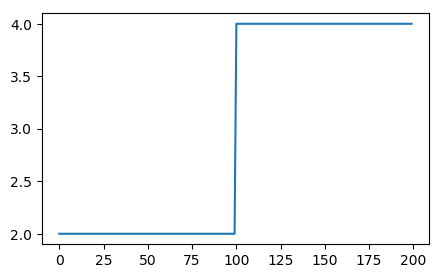

In [383]:
fig, ax = subplots(figsize=(5,3))
ind = [find(train_y .== 2)[1:10] ; find(train_y .== 4)[1:10]];
ax[:plot](train_y[ind]);

In [384]:
x = reshape(train_x[:,:,ind], 28^2, 200)'; y = train_y[ind];
x = x/100;

In [499]:
function plot_mnist(x; ind = 1)
    fig, ax = subplots(figsize=(5,3))
    p = reshape(x[ind,:],28,28)';
    ax[:pcolormesh](p[end:-1:1,:],cmap = "PuBu");
    ax[:axis]("off");
end

plot_mnist (generic function with 1 method)

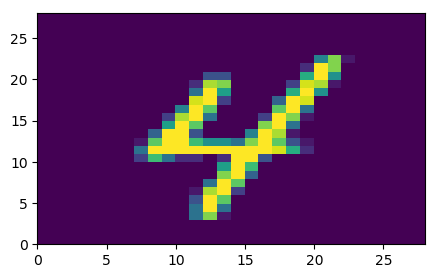

In [386]:
plot_mnist(x,ind = 200);

In [387]:
function hier_clust(x; v0 = 1e-1, iter = 100)
    n,m = size(x);
    X = x + 1e-10 * randn(n,m);
    #S = randperm(n)[1:k];
    M = x + 1e-10 * randn(n,m);
    for i = 1:iter
        # calculate squared distance
        d2 = reshape(sum((repeat(X,outer = [n,1]) - repeat(M,inner = [n,1])).^2,2),n,n);
        
        # update Q
        Q = exp.(-d2/v0); Q = Q./ sum(Q,2);
        R = Diagonal(1./sum(Q,1)[:]) * Q'; L = Q * R;
        
        # update X, M
        X = (eye(n) + L)\full(x);
        M = R * X;
    end
    return X, M
end

hier_clust (generic function with 1 method)

In [388]:
out1 = hier_clust(sparse(x), v0 = 1e-3, iter = 30);

In [494]:
out0 = hier_clust(sparse(x), v0 = 1e-2, iter = 30);

In [412]:
out2 = hier_clust(sparse(x), v0 = 1e-3/2, iter = 30);
out3 = hier_clust(sparse(x), v0 = 1e-3/4, iter = 30);

In [450]:
out4 = hier_clust(sparse(x), v0 = 1e-3/1.2, iter = 30);

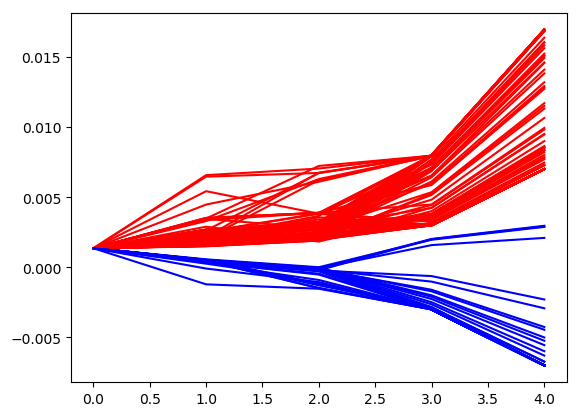

In [572]:
i = 212
t = [out0[2][:,i] out1[2][:,i] out4[2][:,i] out3[2][:,i] x[:,i]];
c = floor.(Int,ones(100)); c = [c; c*2];
d = ["red"; "blue"];
d = d[c]
t[1:100,5] += 0.007; t[101:200,5] -= 0.007;
t[1:100,4] += 0.003; t[101:200,4] -= 0.003;
t[1:100,3] += 0.001; t[101:200,3] -= 0.001;
t[1:100,2] += 0.0005; t[101:200,2] -= 0.0005;
for i = 1:100
    plot(t[i,:], color = d[i])
    plot(t[i+100,:], color = d[i+100])
end

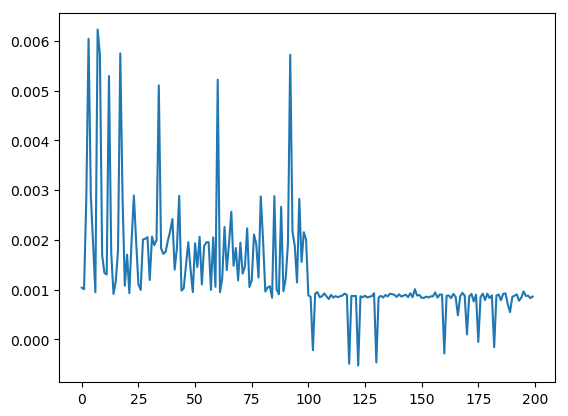

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x16d5328d0>

In [561]:
plot(t[:,3])

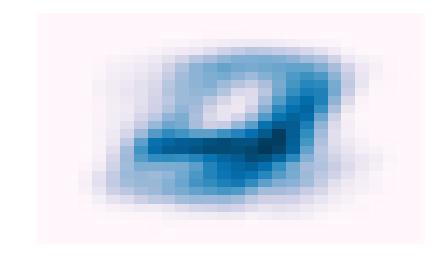

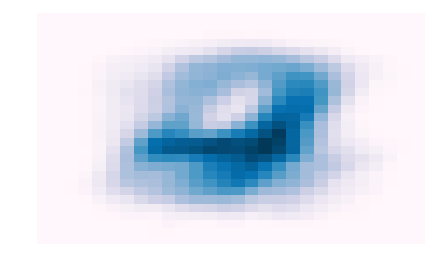

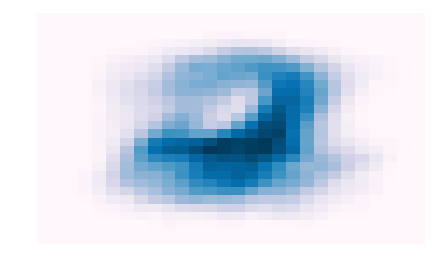

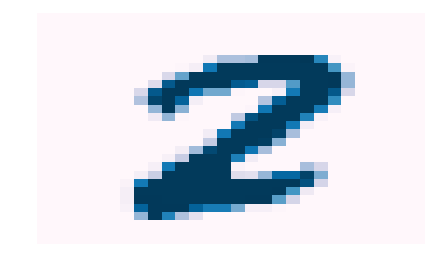

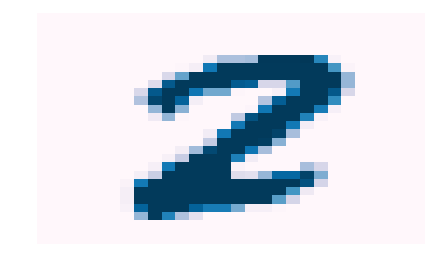

(0.0, 28.0, 0.0, 28.0)

In [607]:
i = 98
plot_mnist(out0[2],ind = i);
plot_mnist(out1[2],ind = i)
plot_mnist(out4[2],ind = i)
plot_mnist(out3[2],ind = i)
plot_mnist(x,ind = i)

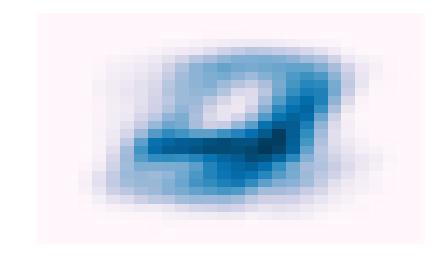

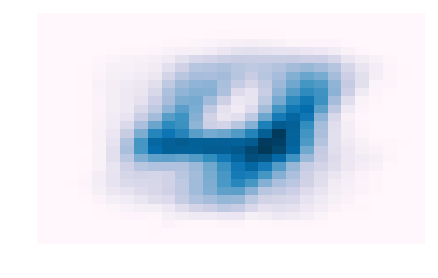

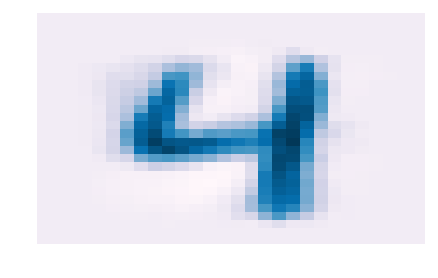

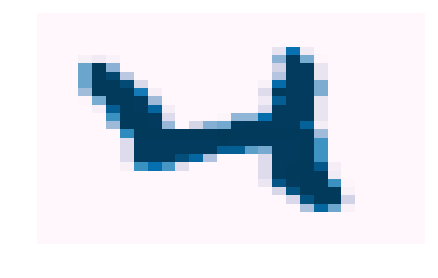

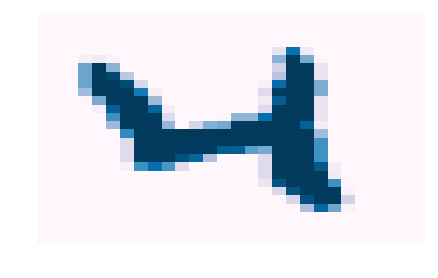

(0.0, 28.0, 0.0, 28.0)

In [514]:
plot_mnist(out0[2],ind = 103);
plot_mnist(out1[2],ind = 103)
plot_mnist(out4[2],ind = 103)
plot_mnist(out3[2],ind = 103)
plot_mnist(x,ind = 103)

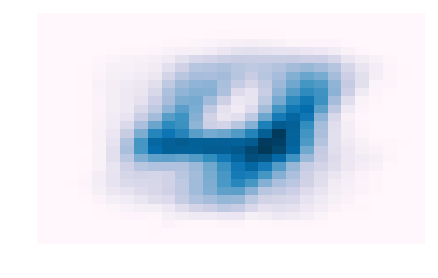

(0.0, 28.0, 0.0, 28.0)

In [501]:
plot_mnist(out1[2],ind = 103)

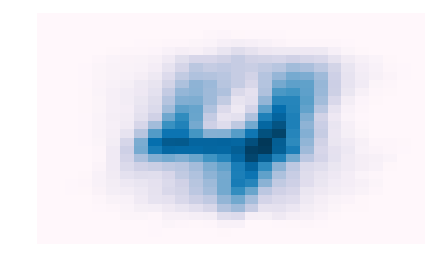

(0.0, 28.0, 0.0, 28.0)

In [502]:
plot_mnist(out2[2], ind = 104)

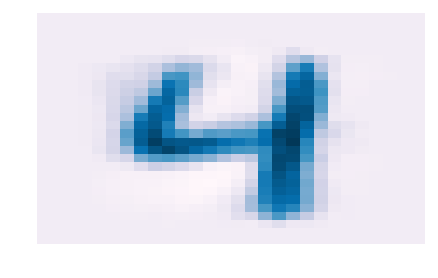

(0.0, 28.0, 0.0, 28.0)

In [504]:
plot_mnist(out4[2],ind = 103)

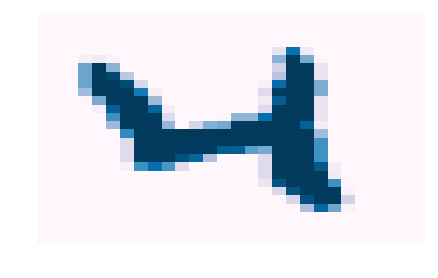

(0.0, 28.0, 0.0, 28.0)

In [505]:
plot_mnist(x,ind = 103)

In [288]:
out11 = hier_clust(sparse(x), v0 = 1e-3, iter = 30);

In [324]:
out12 = hier_clust(sparse(x), v0 = 1e-3/2, iter = 20);

In [325]:
out13 = hier_clust(sparse(x), v0 = 1e-3/4, iter = 20);

In [346]:
function clust_graph(X; thresh = 1e-4)
    n = size(X,1);
    A = reshape(sum((repeat(X,outer = [n,1]) - repeat(X,inner = [n,1])).^2,2),n,n);
    B = A .< thresh;
    G = Graph(B);
    c = connected_components(G)
    return G, c 
end

clust_graph (generic function with 1 method)

In [380]:
c = clust_graph(out11[2], thresh = 1e-10)[2];
c

288-element Array{Array{Int64,1},1}:
 [1]           
 [2]           
 [3]           
 [4]           
 [5]           
 [6]           
 [7]           
 [8]           
 [9]           
 [10]          
 [11, 72, 249] 
 [12, 236, 292]
 [13]          
 ⋮             
 [288]         
 [289]         
 [290]         
 [291]         
 [293]         
 [294]         
 [295]         
 [296]         
 [297]         
 [298]         
 [299]         
 [300]         

In [600]:
clust_graph(out0[2], thresh = 1e-8)[2]

1-element Array{Array{Int64,1},1}:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  191, 192, 193, 194, 195, 196, 197, 198, 199, 200]

In [592]:
c = clust_graph(out1[2], thresh = 1e-8)[2]

80-element Array{Array{Int64,1},1}:
 [1, 20, 26, 60, 75, 83, 84, 91, 96]                                                          
 [2, 87]                                                                                      
 [3]                                                                                          
 [4]                                                                                          
 [5]                                                                                          
 [6]                                                                                          
 [7, 15, 27, 50, 58, 62, 82, 88, 90, 101  …  188, 191, 192, 193, 195, 196, 197, 198, 199, 200]
 [8]                                                                                          
 [9]                                                                                          
 [10, 38]                                                                                     
 [11]         

In [593]:
clust_graph(out4[2], thresh = 1e-8)[2]

103-element Array{Array{Int64,1},1}:
 [1, 83]              
 [2, 87, 148]         
 [3]                  
 [4]                  
 [5, 24]              
 [6]                  
 [7, 50, 62, 105, 157]
 [8]                  
 [9]                  
 [10]                 
 [11]                 
 [12]                 
 [13]                 
 ⋮                    
 [123]                
 [131]                
 [161]                
 [167]                
 [171]                
 [174]                
 [176]                
 [179, 186]           
 [183]                
 [189]                
 [190]                
 [194]                

In [594]:
clust_graph(out3[2], thresh = 1e-8)[2]

200-element Array{Array{Int64,1},1}:
 [1]  
 [2]  
 [3]  
 [4]  
 [5]  
 [6]  
 [7]  
 [8]  
 [9]  
 [10] 
 [11] 
 [12] 
 [13] 
 ⋮    
 [189]
 [190]
 [191]
 [192]
 [193]
 [194]
 [195]
 [196]
 [197]
 [198]
 [199]
 [200]